# Introduction to AI & ML: Regression

In this notebook we are going to use regression models to solve two problems with different datasets.
The code is not complete, so you will need to modify some cells.
For both problems, we will follow these steps:
1. Import data
2. Process data
3. Divide it in train and test
4. Train the models
5. Evaluate the models

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Problem 1: California housing prices
For this first problem, we are going to use a dataset that contains aggregated information from different districts in California; each row represents a district.
These are the features and their meaning:
- **MedInc**: median income in the district
- **HouseAge**: average house age
- **AveRooms**: average number of rooms
- **AveBedrms**: average number of bedrooms
- **Population**: total inhabitants
- **AveOccup**: average occupants per household
- **Latitude**: latitude
- **Longitude**: longitude
- **MedHouseValue**: median house value (target variable)

### 1. Import data

In [ ]:
data = fetch_california_housing(as_frame=True).frame

In [ ]:
data.head()

How many districts are there in our dataset?

In [ ]:
print(f"We have a total of {len(data)} districts")

### 2. Process data

A quick glance at the distribution of our data

In [ ]:
data.describe()

Do we have NA/missing values?

In [ ]:
data.isna().sum()

Do we have outliers?

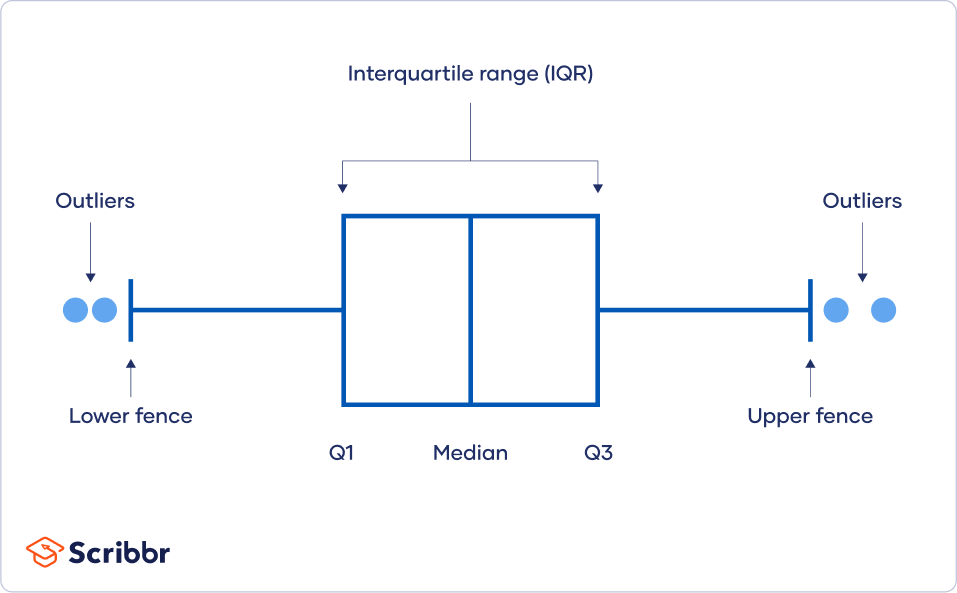

In [ ]:
for col in data.columns:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower) & (data[col] <= upper)]


### 3. Divide in train and test

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

What is the difference between train and test?

In [ ]:
print(f"Train has {len(train)} rows and test has {len(test)} rows")

Before going into training, we must go through the last step, separating our predictive and target variables.

In [ ]:
X_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]

X_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

### 4. Train the model

Alright, now that our data is clean and processed, and that we have divided it in tran and test sets, we are ready to train the model. But which model should we choose?

This is the big question, and the answer depends on multiple factors.
- Predictive features type
- Model complexity
- Relationship between features

All models have different characteristics and adjust better to certain types of datasets. In our case, ALL of our features are ______ and we want to choose a relatively simple model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train);

### 5. Evaluate the model
How can we know if our model's predictions are good?

For that we can use a series of metrics that are calculated comparing the real values (y_test) against the model's predictions (y_pred) for test data.
The most common is the MSE(Mean Squared Error)

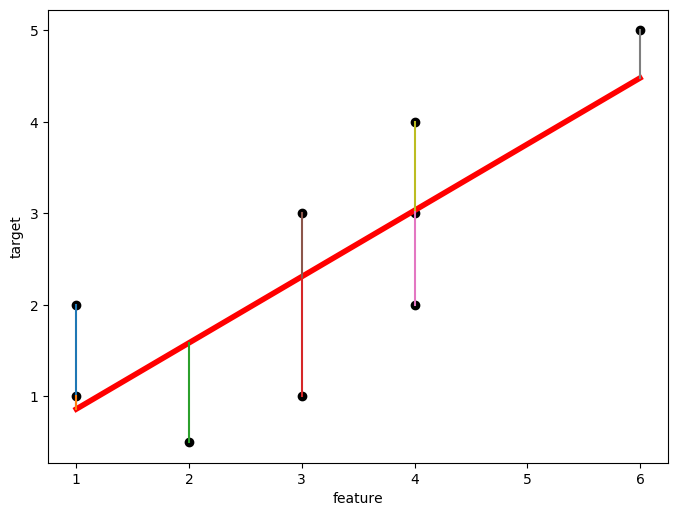


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("=== Training Performance ===")
print("MSE:", mean_squared_error(y_train, y_pred_train))

print("\n=== Test Performance ===")
print("MSE:", mean_squared_error(y_test, y_pred_test))

We can also use matplotlib to check our results visually.

In [ ]:
subset = X_test.copy()
subset['y_real'] = y_test
subset['y_pred'] = model.predict(X_test)
subset_20 = subset.sample(n=20, random_state=42)

index = range(len(subset_20))

plt.figure(figsize=(12,6))

plt.scatter(index, subset_20['y_real'], color='red', label='Valor Real', s=100)
plt.scatter(index, subset_20['y_pred'], color='blue', label='Predicción', s=100, marker='x')

plt.xticks(index, subset_20.index, rotation=45)
plt.ylabel('Target')
plt.title('Comparison of 20 Real VS Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

## Problem 2: Miles per Gallon

For the second problem, we are going to do something similar but with a very different dataset. This will teach us that we must understand the data well to adapt every step of the process. Now we will work with different types of variables, and we will compare different models to choose the best one.

These are the variables we will be working with:

- **mpg**: fuel consumption in miles per gallon (target variable)
- **cylinders**: number of engine cylinders
- **displacement**: engine size
- **horsepower**: engine power
- **weight**: vehicle weight
- **acceleration**: time it takes to speed up from 0 to 60 mph
- **model_year**: year of the car model
- **origin**: manufacturing region
- **name**: car name (brand and model)


### 1. Import data

In [ ]:
mpg = sns.load_dataset("mpg")

In [ ]:
# Complete: show the first 5 rows of the dataset

How many observations/rows?

In [ ]:
print(f"We have a total of  {len(mpg)} cars")

### 2. Process data

In [ ]:
mpg.describe()

Unlike in the first problem, this time we have to process some variables individually

In [ ]:
print(f"There are a total of {len(mpg['name'].unique())} different names/car models")

In [ ]:
# Complete: drop the 'name' column

Additionally, the origin variable is not numerical, which means our models won’t be able to train with it as it is.
We need to change its format because if we simply removed it, we would lose valuable information.
We will convert it into a **dummy variable**.


In [ ]:
print(mpg['origin'].unique())

In [ ]:
mpg = pd.get_dummies(mpg, columns=['origin'], drop_first=True)
mpg.head()

Missing values

In [ ]:
mpg.isna().sum()

We replace them with the mean value

In [ ]:
# Complete: calculate the average horsepower
average_horsepower = ''
mpg.loc[mpg['horsepower'].isna(), 'horsepower'] = average_horsepower

Outliers

In [ ]:
numeric_columns = mpg.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:

    Q1 = mpg[col].quantile(0.25)
    Q3 = mpg[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    total_outliers = len(mpg[(mpg[col] < lower) | (mpg[col] > upper)])

    print(f"Column {col} has {total_outliers} outliers")
    mpg = mpg[(mpg[col] >= lower) & (mpg[col] <= upper)]


### 3. Divide in train and test

In [ ]:
train, test = train_test_split(mpg, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

In [ ]:
print(f"Train has {len(train)} rows and test has {len(test)} rows")

In [ ]:
X_train = train.drop(columns=["mpg"])
y_train = train["mpg"]

X_test = test.drop(columns=["mpg"])
y_test = test["mpg"]

### 4. Train the models
For this problem we are going to train two different models, compare the results and choose the best regression model for this task.

Model 1: RandomForest

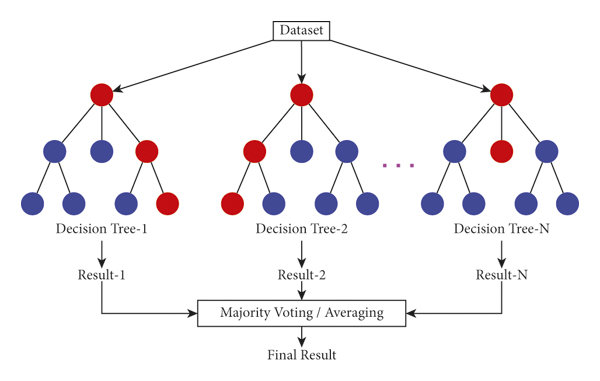

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train);

Model 2: Support Vector Machine

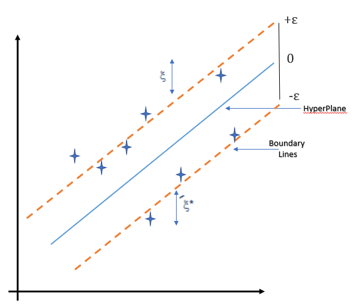

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
# Fill in the arguments to train the model
svr.fit();

### 5. Evaluate the models

In [ ]:
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")

In [ ]:
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR - Mean Squared Error: {mse_svr:.2f}")